In [1]:
# 1) Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2) Import Dataframe
df=pd.read_csv("C:/Users/Selva.M/Downloads/data_science/project_4/kidney_disease - kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
# 3) Fill NaN values for Numeric and Categorical columns with median..
num_cols= ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)


cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [9]:
# 4) Encoding dataframe
from sklearn.preprocessing import LabelEncoder
cat_cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

encoders = {}   
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [10]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.8,0,0,0,0,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,ckd


In [11]:
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

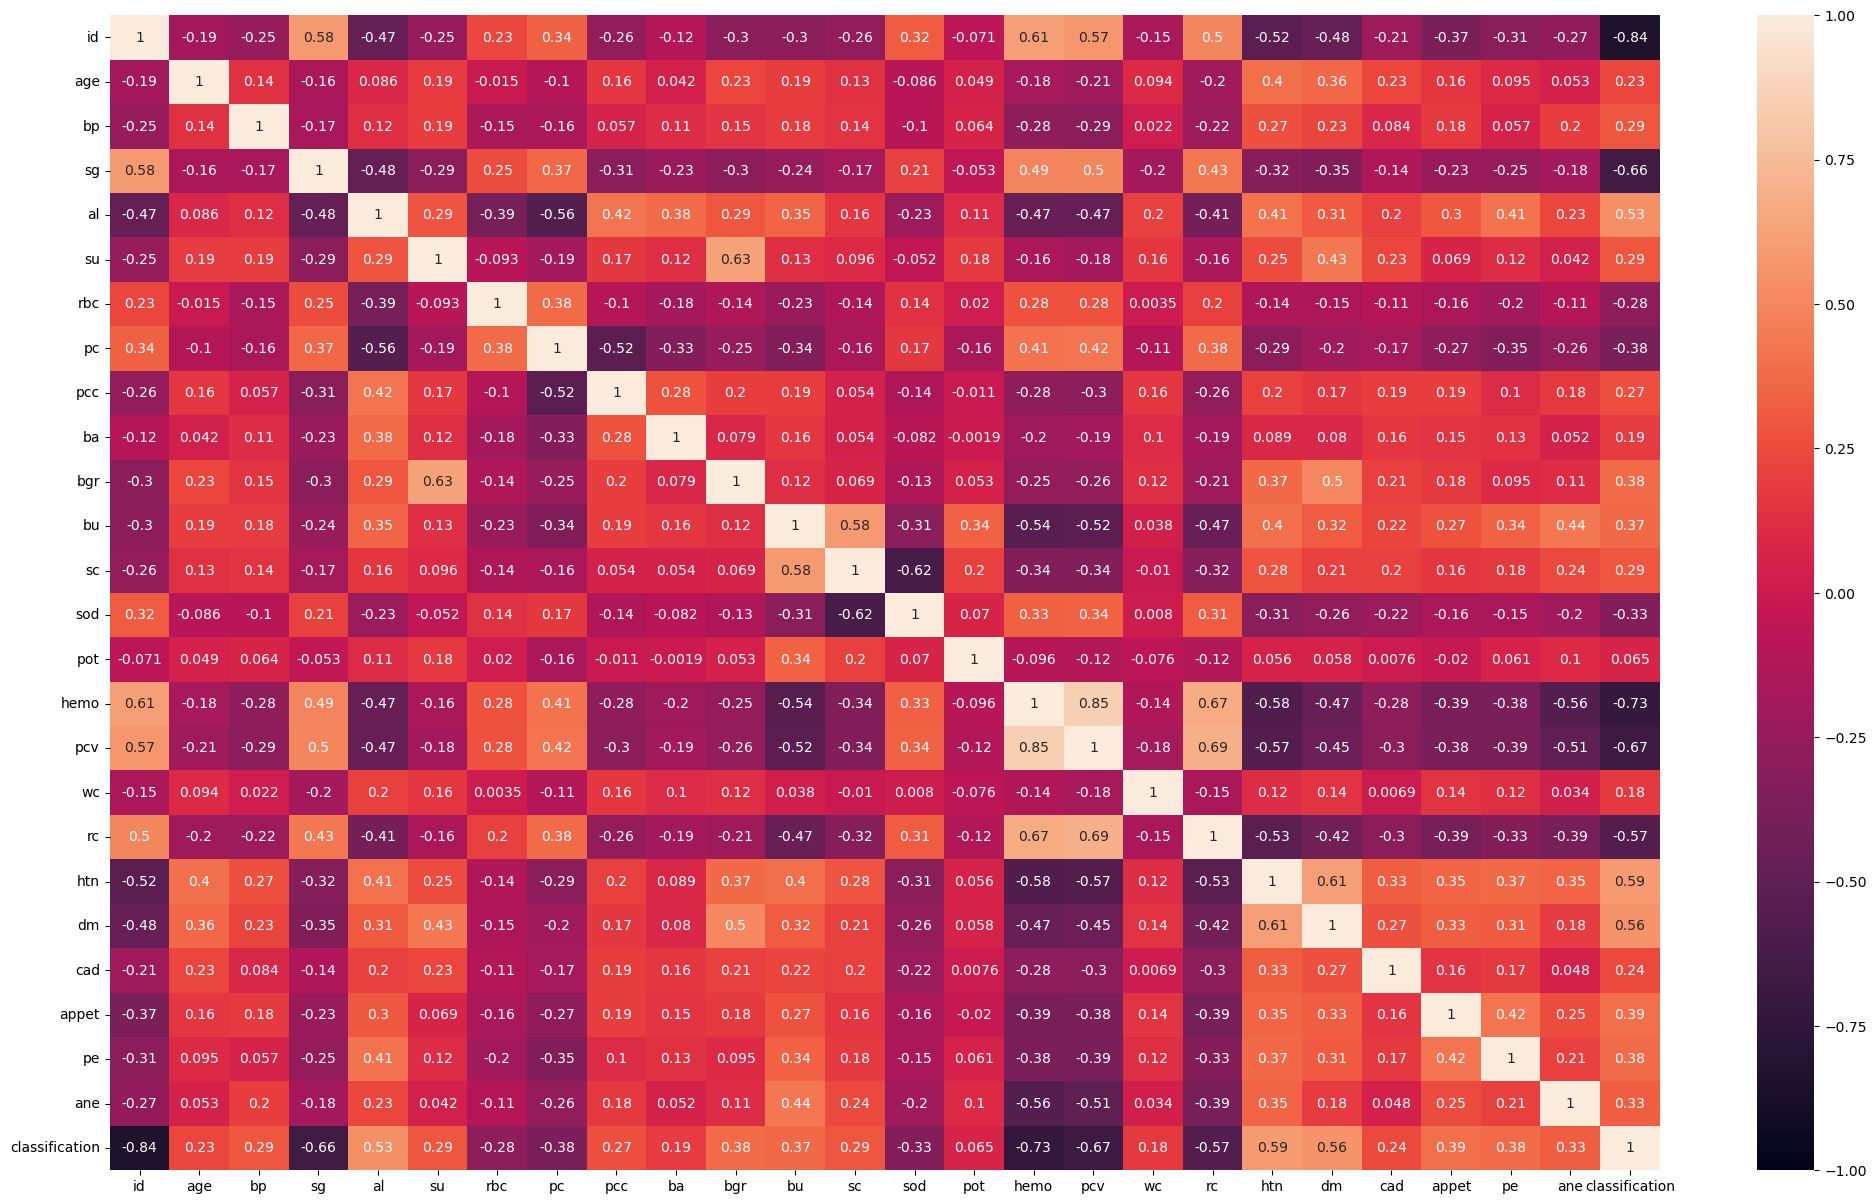

In [12]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [13]:
df.corr()['classification'].sort_values(ascending=False)

classification    1.000000
htn               0.590438
dm                0.559060
al                0.531562
appet             0.393341
bgr               0.379321
pe                0.375154
bu                0.369393
ane               0.325396
su                0.294555
bp                0.293693
sc                0.291245
pcc               0.265313
cad               0.236088
age               0.227842
ba                0.186871
wc                0.177571
pot               0.065218
rbc              -0.282642
sod              -0.334900
pc               -0.375154
rc               -0.566163
sg               -0.659504
pcv              -0.673129
hemo             -0.726368
id               -0.838528
Name: classification, dtype: float64

In [14]:
# 5) Select Features And Target
x = df.drop(columns=['classification','id'])
y = df['classification']

print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (400, 24)
Shape of y: (400,)


In [15]:
# 6) Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (320, 24)
Shape of y_train: (320,)
Shape of X_test: (80, 24)
Shape of y_test: (80,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
models = {
    'Logistic Regression':(LogisticRegression(),{}),
    'KNN':(KNeighborsClassifier(),{'model__n_neighbors':[1,3,6,7,10],'model__weights':['uniform','distance']}),
    'Decision Tree':(DecisionTreeClassifier(),{'model__max_depth':[1,4,6,8,10],'model__criterion':['gini','entropy']}),
    'Random Forest':(RandomForestClassifier(),{'model__n_estimators':[10,20,30,40,50],'model__criterion':['gini','entropy']})
}

In [18]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [19]:
# 7) Model Train 
results = {}

for name,(model,params) in models.items():
  pipe = ImbPipeline([
                      ('scaler',StandardScaler()),
                      ('smote',SMOTE()),
                      ('model',model)
  ])

  grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')
  grid.fit(x_train,y_train)

  best_model = grid.best_estimator_ 
  y_hat = best_model.predict(x_test)

  y_hat = grid.predict(x_test)
  acc = accuracy_score(y_test,y_hat)
  f1 = f1_score(y_test,y_hat)
  recall = recall_score(y_test,y_hat)
  precision = precision_score(y_test,y_hat)

  results[name] = {
      'model':name,
      'best_params':grid.best_params_,
      'score':grid.best_score_,
      'accuracy':acc,
      'f1_score':f1,
      'recall':recall,
      'precision':precision,
  }
 

In [20]:
result_df = pd.DataFrame(results).T
result_df

,model,best_params,score,accuracy,f1_score,recall,precision
Logistic Regression,Logistic Regression,{},0.990625,0.9875,0.990291,0.980769,1.0
KNN,KNN,"{'model__n_neighbors': 1, 'model__weights': 'u...",0.9875,0.9875,0.990291,0.980769,1.0
Decision Tree,Decision Tree,"{'model__criterion': 'entropy', 'model__max_de...",0.975,0.9875,0.990291,0.980769,1.0
Random Forest,Random Forest,"{'model__criterion': 'gini', 'model__n_estimat...",0.9875,1.0,1.0,1.0,1.0


In [21]:
# 8) Best Model
print(best_model)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('model', RandomForestClassifier(n_estimators=10))])


In [22]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



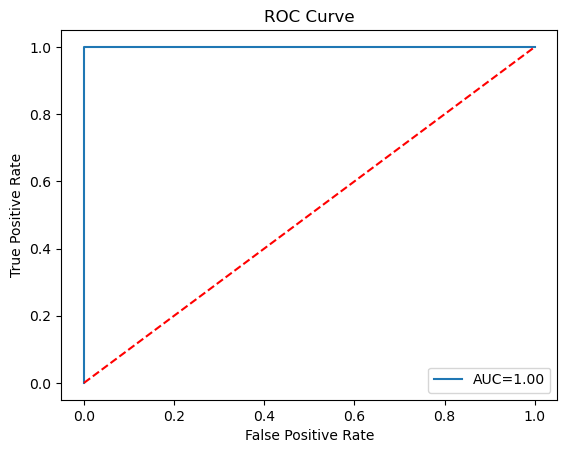

In [23]:
y_prob =best_model.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])
plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat)
cm

array([[28,  0],
       [ 0, 52]])

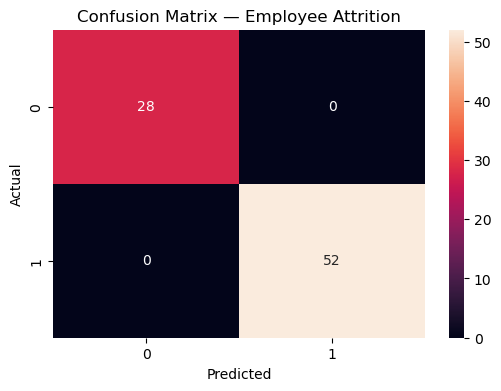

In [25]:
plt.rcParams['figure.figsize'] = [6,4]
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Employee Attrition")
plt.show()

In [26]:
#11) Save Cleaned Data
df.to_csv("cleaned_Kidney_dataset.csv", index=False)

In [27]:
cdf = pd.read_csv("C:/Users/Selva.M/Downloads/data_science/project_4/cleaned_Kidney_dataset.csv")
pd.set_option("display.max_column", None)
cdf.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [28]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [29]:
package = {
    "model": best_model,
    "encoders":encoders,
    "feature_names": x.columns.tolist()
}

In [30]:
print(package)

{'model': Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('model', RandomForestClassifier(n_estimators=10))]), 'encoders': {'rbc': LabelEncoder(), 'pc': LabelEncoder(), 'pcc': LabelEncoder(), 'ba': LabelEncoder(), 'htn': LabelEncoder(), 'dm': LabelEncoder(), 'cad': LabelEncoder(), 'appet': LabelEncoder(), 'pe': LabelEncoder(), 'ane': LabelEncoder()}, 'feature_names': ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']}


In [31]:
# 12) Saving Best Model
import pickle

with open('best_kidney_model.pkl','wb') as f:
    pickle.dump(package,f)